In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import kn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_I_SD = (1905.0e6)*0.75
Sigma_II_SD = (536.0e6)*0.75
z_0 = 0.3#kpc
z_1 = 1.#kpc

In [3]:
R = np.linspace(0.1,15.,100)

In [4]:
def Int_SD_v2(a,zp,R,z=0.,alpha_0=0.5,z1=z_1,z0=z_0,R_d=R_d_I):
    d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
    u = (2.*a)/d
    t2 = u/np.sqrt(1-u**2.)
    t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
    g = -a*kn(0,a/R_d)*t2*t1/d
    f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
    return R*f*g

In [5]:
Integral_d = []
for i in range (0,len(R)):
    integrando = lambda a,zp: Int_SD_v2(a,zp,R[i])
    result = integrate.dblquad(integrando,-np.inf,np.inf,lambda zp: 0.1, lambda zp: np.inf)[0]
    Integral_d.append(result)
#print Integral_d

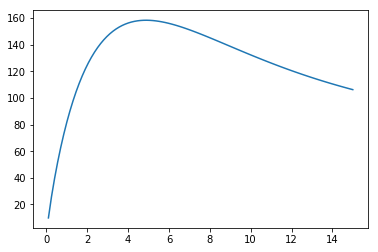

In [6]:
Vc2_SD = np.array(Integral_d)
C = 4.*G*Sigma_I_SD/R_d_I
Vc_SD = np.sqrt(-C*Vc2_SD)
plt.plot(R,Vc_SD)

In [7]:
def Int_SD_II(a,zp,R,z=0.,alpha_0=0.5,z1=z_1,z0=z_0,R_d=R_d_II):
    d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
    u = (2.*a)/d
    t2 = u/np.sqrt(1-u**2.)
    t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
    g = -a*kn(0,a/R_d)*t2*t1/d
    f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
    return R*f*g

In [8]:
Integral_II = []
for i in range (0,len(R)):
    integrand = lambda a,zp: Int_SD_II(a,zp,R[i])
    resultado = integrate.dblquad(integrand,-np.inf,np.inf,lambda zp: 0.1, lambda zp: np.inf)[0]
    Integral_II.append(resultado)
#print Integral_II

Text(0,0.5,'$V^{2}_{c}/km s^{-2}$')

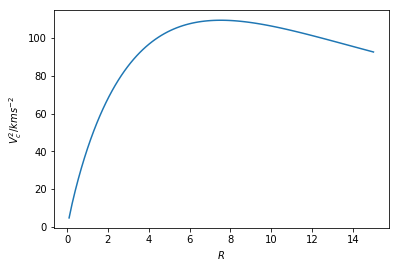

In [9]:
Vc2_SD_II = np.array(Integral_II)
C_II = 4.*G*Sigma_II_SD/R_d_II
Vc_SD_II = np.sqrt(-C_II*Vc2_SD_II)
plt.plot(R,Vc_SD_II)
plt.xlabel(r'$R$')
plt.ylabel(r'$V^{2}_{c}/km s^{-2}$')

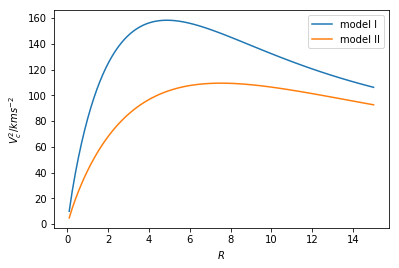

In [10]:
plt.plot(R,Vc_SD,label='model I')
plt.plot(R,Vc_SD_II,label='model II')
plt.xlabel(r'$R$')
plt.ylabel(r'$V^{2}_{c}/km s^{-2}$')
plt.legend(loc='upper right', prop={'size':10})

Ahora calcularemos las diferencias relativas entre la versión 2 y la versión 4

In [11]:
def V2_c_approx(R,R_d=2.0):
    result = (R_d/R) - np.exp(-R/R_d) - (np.exp(-R/R_d)*(R_d/R))
    return result

In [12]:
C_I_approx = 2.*np.pi*G*Sigma_I_SD*R_d_I
C_II_approx = 2.*np.pi*G*Sigma_II_SD*R_d_II

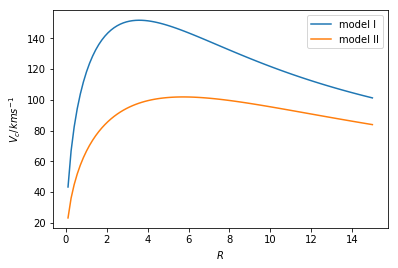

In [13]:
plt.plot(R,np.sqrt(C_I_approx*V2_c_approx(R)),label='model I')
plt.plot(R,np.sqrt(C_II_approx*V2_c_approx(R,R_d=R_d_II)),label='model II')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

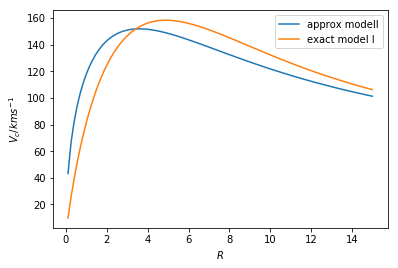

In [14]:
plt.plot(R,np.sqrt(C_I_approx*V2_c_approx(R)),label='approx modelI')
plt.plot(R,Vc_SD,label='exact model I')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='upper right', prop={'size':10})
plt.show()

In [15]:
dif_I = np.sqrt(C_I_approx*V2_c_approx(R))- Vc_SD
#print dif_I

In [16]:
print (dif_I/Vc_SD)*100.

[ 3.36787938e+02  1.58558284e+02  1.08640051e+02  8.22376242e+01
  6.53067411e+01  5.33153924e+01  4.42847464e+01  3.71935044e+01
  3.14540613e+01  2.67012678e+01  2.26947250e+01  1.92688745e+01
  1.63055011e+01  1.37176476e+01  1.14397379e+01  9.42126210e+00
  7.62259910e+00  6.01217180e+00  4.56445973e+00  3.25858001e+00
  2.07725403e+00  1.00604182e+00  3.27659142e-02 -8.52928284e-01
 -1.65991230e+00 -2.39584023e+00 -3.06735860e+00 -3.68027378e+00
 -4.23968671e+00 -4.75010226e+00 -5.21551852e+00 -5.63950045e+00
 -6.02524085e+00 -6.37561112e+00 -6.69320394e+00 -6.98036913e+00
 -7.23924410e+00 -7.47177967e+00 -7.67976221e+00 -7.86483257e+00
 -8.02850242e+00 -8.17216831e+00 -8.29712393e+00 -8.40457069e+00
 -8.49562704e+00 -8.57133648e+00 -8.63267472e+00 -8.68055587e+00
 -8.71583796e+00 -8.73932773e+00 -8.75178496e+00 -8.75392620e+00
 -8.74642820e+00 -8.72993083e+00 -8.70503981e+00 -8.67232902e+00
 -8.63234271e+00 -8.58559731e+00 -8.53258321e+00 -8.47376630e+00
 -8.40958932e+00 -8.34047

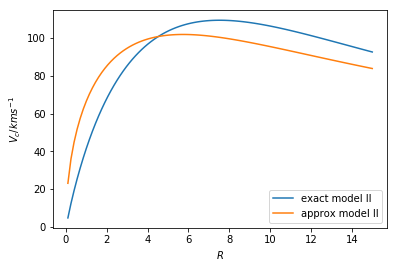

In [17]:
plt.plot(R,Vc_SD_II,label='exact model II')
plt.plot(R,np.sqrt(C_II_approx*V2_c_approx(R,R_d=R_d_II)),label='approx model II')
#xlim(0.,15.)
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})
plt.show()

In [18]:
dif_II =  np.sqrt(C_II_approx*V2_c_approx(R,R_d=R_d_II)) - Vc_SD_II
#print dif_II

In [19]:
print (dif_II/Vc_SD_II)*100.

[ 3.86640363e+02  1.90377292e+02  1.33858410e+02  1.03769572e+02
  8.43890660e+01  7.06063734e+01  6.01827466e+01  5.19605824e+01
  4.52730528e+01  3.97054358e+01  3.49845367e+01  3.09221350e+01
  2.73837971e+01  2.42706208e+01  2.15080190e+01  1.90385449e+01
  1.68171442e+01  1.48079202e+01  1.29818741e+01  1.13152903e+01
  9.78856098e+00  8.38531470e+00  7.09176049e+00  5.89618745e+00
  4.78857785e+00  3.76030460e+00  2.80389217e+00  1.91282592e+00
  1.08139848e+00  3.04585183e-01 -4.22057886e-01 -1.10247784e+00
 -1.74019457e+00 -2.33835887e+00 -2.89980110e+00 -3.42707234e+00
 -3.92247922e+00 -4.38811359e+00 -4.82587801e+00 -5.23750751e+00
 -5.62458849e+00 -5.98857503e+00 -6.33080310e+00 -6.65250294e+00
 -6.95480990e+00 -7.23877394e+00 -7.50536805e+00 -7.75549561e+00
 -7.98999699e+00 -8.20965532e+00 -8.41520169e+00 -8.60731976e+00
 -8.78664991e+00 -8.95379291e+00 -9.10931323e+00 -9.25374209e+00
 -9.38758007e+00 -9.51129960e+00 -9.62534710e+00 -9.73014503e+00
 -9.82609366e+00 -9.91357

In [20]:
print "SAD:", np.sum(np.abs(dif_II))
print "SSD:", np.sum(np.square(dif_II))
print "StandardD", np.std(dif_II)

SAD: 1047.6965215971645
SSD: 14313.901476984442
StandardD 11.819802287329361


In [21]:
def Int_SD_test(zp,a,R,z=0.,alpha_0=0.5,z1=z_1,z0=z_0,R_d=R_d_I):
    d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
    u = (2.*a)/d
    t2 = u/np.sqrt(1-u**2.)
    t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
    g = -a*kn(0,a/R_d)*t2*t1/d
    f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
    return R*f*g

In [54]:
a_lims = np.linspace(0.1, 50.0,1000)
zp_lims = np.linspace(-50.0,50.0,1000)
Integral_SD_sims = []
R = np.linspace(0.1,15.,100)
fun_zp = np.zeros(len(zp_lims))

In [41]:
#esto tarda 5 min aprox, que es lo mismo que tarda dblquad

In [55]:
Integral_SD_sims = []
for k in range(0,len(R)):
    for i in range(0,len(zp_lims)):
        fun_zp[i] = integrate.simps(Int_SD_test(zp_lims[i],a_lims,R[k]),a_lims)#, axis=-1, even='avg')
        #print fun_zp[i]
    result = integrate.simps(fun_zp,zp_lims)#, axis=-1, even='avg')
    Integral_SD_sims.append(result)
print Integral_SD_sims

[-0.008137279207093045, -0.05362052828463533, -0.12572237728894595, -0.2160075062723041, -0.31845814737231193, -0.42851514698801607, -0.5426751009067626, -0.6582290905858034, -0.7730816430052083, -0.8856193181823561, -0.9946120532877869, -1.0991372129850727, -1.1985199910624782, -1.2922859489992524, -1.3801227855981528, -1.4618492680914934, -1.537389810066915, -1.6067535618419573, -1.6700171468659901, -1.7273103711646745, -1.778804375492544, -1.8247018070496939, -1.8652286695107652, -1.900627573604993, -1.931152160355783, -1.9570625087152353, -1.9786213711423621, -1.9960911064486644, -2.009731200287429, -2.0197962809833427, -2.0265345527398333, -2.0301865802031402, -2.030984368355824, -2.029150690113293, -2.024898621086334, -2.0184312469760055, -2.0099415141661474, -1.9996121984206567, -1.9876159702984335, -1.9741155390674319, -1.9592638596130394, -1.9432043891631072, -1.9260713826495537, -1.907990217242578, -1.8890777380683699, -1.869442618389169, -1.8491857286145177, -1.8284005094493

In [57]:
C = 4.*G*Sigma_I_SD/R_d_I
print len(Integral_SD_sims)#,np.sqrt(-C*array_int_sims)

100


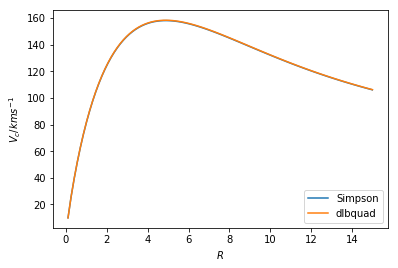

In [58]:
array_int_sims = np.array(Integral_SD_sims)
plt.plot(R,np.sqrt(-C*array_int_sims),label='Simpson')
plt.plot(R,Vc_SD,label='dlbquad')
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})

In [45]:
#####¿?

In [47]:
a_lims_I = np.linspace(0.1, 50.0,100)
zp_lims_I = np.linspace(-500.0,500.0,1000)
Integral_SD_sims_I = []
R = np.linspace(0.1,15.,100)
fun_zp_I = np.zeros(len(zp_lims))

In [48]:
for k in range(0,len(R)):
    for i in range(0,len(zp_lims_I)):
        fun_zp_I[i] = integrate.simps(Int_SD_test(zp_lims_I[i],a_lims_I,R[k]),a_lims_I)#, axis=-1, even='avg')
        #print fun_zp[i]
    result = integrate.simps(fun_zp_I,zp_lims_I)#, axis=-1, even='avg')
    Integral_SD_sims_I.append(result)
print Integral_SD_sims_I

[-0.0041532640203034675, -0.02613278925909897, -0.06721096619964853, -0.12562504896114207, -0.19502973327581488, -0.27006034645309945, -0.3507225986404572, -0.4347438535239068, -0.5172800041529746, -0.5994362505217574, -0.6824753191830527, -0.761661049409047, -0.836241070356894, -0.9098379512097677, -0.9797820027693098, -1.0430274325434477, -1.1033766659403392, -1.1611911806601558, -1.212306483440904, -1.2587542109235141, -1.3034283365771473, -1.3428690414483229, -1.376576482115444, -1.408435354961734, -1.4370352128242994, -1.459923444328648, -1.48026800372388, -1.4989672050339162, -1.5129943359316678, -1.5237150098237917, -1.5335866213586087, -1.5403810423067712, -1.5435453791304745, -1.545865550795995, -1.5466639860040934, -1.5441663406919934, -1.5403914624789157, -1.5361627284518065, -1.5295141756522437, -1.521152925023504, -1.5127669082691373, -1.5030488804099011, -1.4914920991333387, -1.4798285884401974, -1.4677761988428273, -1.4541591807493632, -1.4401195299074117, -1.42626432925

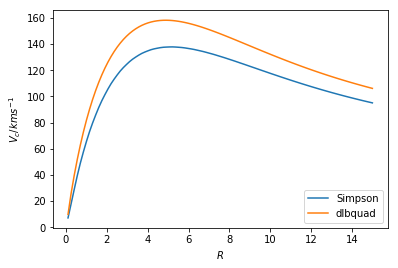

In [49]:
array_int_sims_I = np.array(Integral_SD_sims_I)
plt.plot(R,np.sqrt(-C*array_int_sims_I),label='Simpson')
plt.plot(R,Vc_SD,label='dlbquad')
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})

In [187]:
a_lims_II = np.linspace(0.1, 15.0,100)
zp_lims_II = np.linspace(-15.0,15.0,200)
Integral_SD_sims_II = []
R_II = np.linspace(0.1,15.,100)
fun_zp_II = np.zeros(len(zp_lims_II))

In [188]:
print len(R_II),len(a_lims_II),len(zp_lims_II)

100 100 200


In [189]:
for k in range(0,len(R_II)):
    for i in range(0,len(zp_lims_II)):
        fun_zp_II[i] = integrate.simps(Int_SD_test(zp_lims_II[i],a_lims_II,R_II[k]),a_lims_II)#, axis=-1, even='avg')
        #print fun_zp[i]
    result = integrate.simps(fun_zp_II,zp_lims_II)#, axis=-1, even='avg')
    Integral_SD_sims_II.append(result)
print Integral_SD_sims_II

[-0.008078692146039944, -0.053849245885180655, -0.12645193337362512, -0.21645834264602823, -0.3185965784836861, -0.4283126934312081, -0.5421109917931278, -0.6572908475500724, -0.7717641995146282, -0.8839238233693324, -0.9925447006019816, -1.0967081925629847, -1.1957425864265248, -1.289175772211633, -1.3766971366088745, -1.4581266023034913, -1.533389298879751, -1.6024947324910537, -1.6655195895968236, -1.7225935034195627, -1.7738872542555417, -1.819602981775264, -1.8599660691642155, -1.89521842228659, -1.9256129167871756, -1.9514088255563704, -1.972868070697033, -1.9902521698223592, -2.0038197674949885, -2.0138246598767924, -2.0205142349476, -2.0241282625481714, -2.0248979784582484, -2.0230454150884563, -2.018782938425862, -2.0123129568517806, -2.0038277725279903, -1.9935095503709497, -1.981530383323184, -1.968052435785652, -1.95322814977637, -1.9372005006971251, -1.9201032915784386, -1.902061476380993, -1.8831915043995924, -1.8636016790776426, -1.8433925256248107, -1.8226571627627675, 

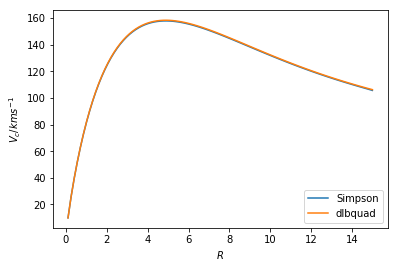

In [190]:
array_int_sims_II = np.array(Integral_SD_sims_II)
plt.plot(R,np.sqrt(-C*array_int_sims_II),label='Simpson')
plt.plot(R,Vc_SD,label='dlbquad')
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})

In [165]:
def Vc2_SD_simps(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 20.0,2*len(R))#200
    zp_lims = np.linspace(-20.0,20.0,4*len(R))#400
    fun_zp = np.zeros(len(zp_lims))
    for k in range(0,len(R)):
        for i in range(0,len(zp_lims)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

In [166]:
%timeit Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_I_SD)

1 loop, best of 3: 1min 35s per loop


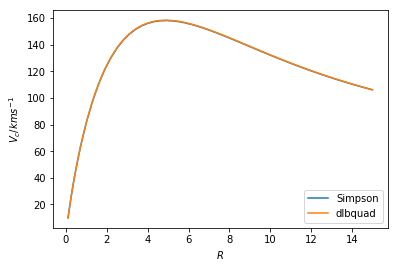

In [169]:
plt.plot(R,np.sqrt(Vc2_SD_simps(R,R_d=R_d_I,Sigma_d_SD=Sigma_I_SD)),label='Simpson')
plt.plot(R,Vc_SD,label='dlbquad')
plt.xlabel(r'$R$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.legend(loc='lower right', prop={'size':10})

In [170]:
%timeit Vc2_SD_simps(R,R_d=R_d_II,Sigma_d_SD=Sigma_II_SD)

1 loop, best of 3: 41.6 s per loop


In [191]:
def Vc2_SD_simps_I(R,R_d,Sigma_d_SD,z=0.,alpha_0=0.5,z1=1.,z0=0.3):
    def I_SD(zp,a,R):
        d = np.sqrt((a+R)**2. + (z-zp)**2.) + np.sqrt((a-R)**2. + (z-zp)**2.)
        u = (2.*a)/d
        t2 = u/np.sqrt(1-u**2.)
        t1 = (a+R)/(np.sqrt((a+R)**2. + (z-zp)**2.)) - (a-R)/(np.sqrt((a-R)**2. + (z-zp)**2.))
        g = -a*kn(0,a/R_d)*t2*t1/d
        f = (alpha_0*np.exp(-abs(zp)/z0))/(2.*z0) + np.exp(-abs(zp)/z1)/(2.*z1) - (alpha_0*np.exp(-abs(zp)/z1))/(2.*z1)
        return R*f*g
    Integral_SD_sims = []
    a_lims = np.linspace(0.1, 15.0,len(R))#200
    zp_lims = np.linspace(-15.0,15.0,2*len(R))#400
    fun_zp = np.zeros(len(zp_lims))
    for k in range(0,len(R)):
        for i in range(0,len(zp_lims)):
            fun_zp[i] = integrate.simps(I_SD(zp_lims[i],a_lims,R[k]),a_lims)
        result = integrate.simps(fun_zp,zp_lims)
        Integral_SD_sims.append(result)
    return -4.*G*Sigma_d_SD*np.array(Integral_SD_sims)/R_d

In [192]:
%timeit Vc2_SD_simps_I(R,R_d=R_d_I,Sigma_d_SD=Sigma_I_SD)

1 loop, best of 3: 35.9 s per loop


In [193]:
%timeit Vc2_SD_simps_I(R,R_d=R_d_II,Sigma_d_SD=Sigma_II_SD)

1 loop, best of 3: 49.5 s per loop
